In [66]:
setwd("/home/pa/Documents/github/doc_suomi/code")
source("utils.R")
source("data_cook.R")
cat(howto_data)

`summarise()` has grouped output by 'album_id', 'name'. You can override using the `.groups` argument.



How to use datasets (Personal library)
 
call    base()             for real values
call    z_scored()         for normalized
call    min_maxed()        for normalized2
call    upsampled_album()  for binded upsamplped albums
call    low_minmax()       for min-maxed low level
call    low_z()            for normalized low level
call    low_raw()          for raw  low level

# Dissimilarities by album length

Tracks 1, 2, 3, etc... are represented by variables X1, X2, X3, etc...

Warning message in melt(.):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(.). In the next version, this warning will become an error.”
No id variables; using all as measure variables

Warning message in melt(.):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(.). In the next version, this warning will become an error.”
No id variables; using all as measure variables

Warning 

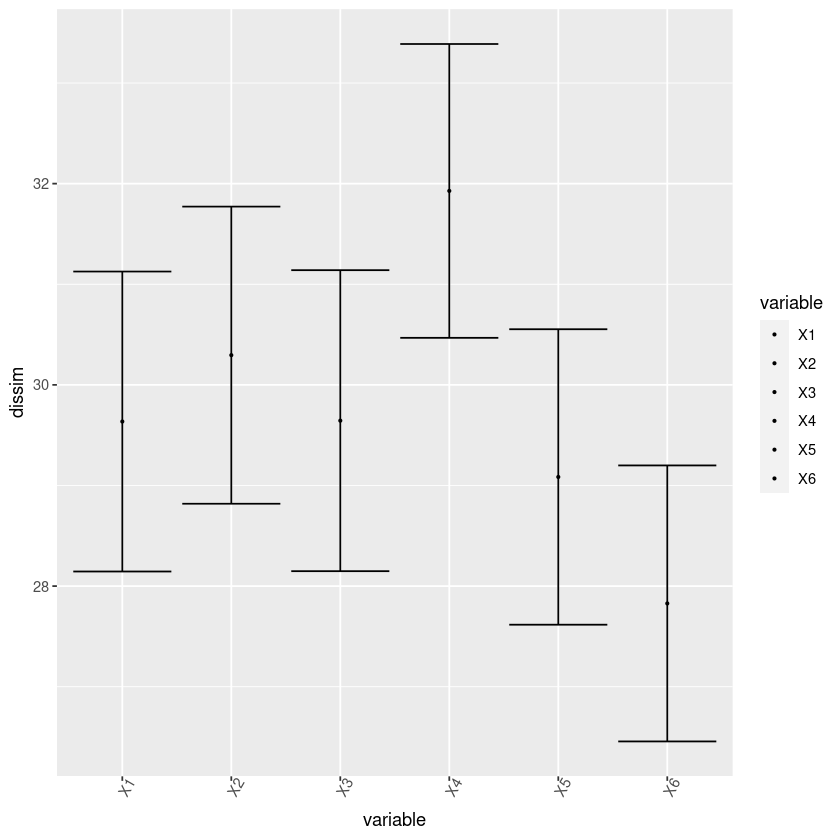

Warning message in melt(.):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(.). In the next version, this warning will become an error.”
No id variables; using all as measure variables



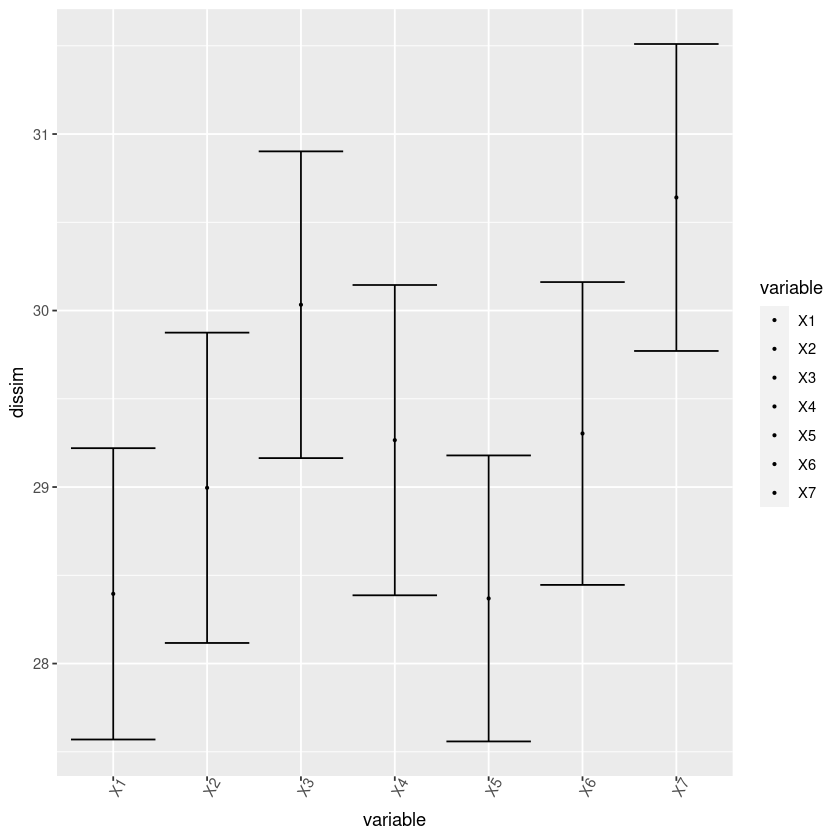

Warning message in melt(.):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(.). In the next version, this warning will become an error.”
No id variables; using all as measure variables



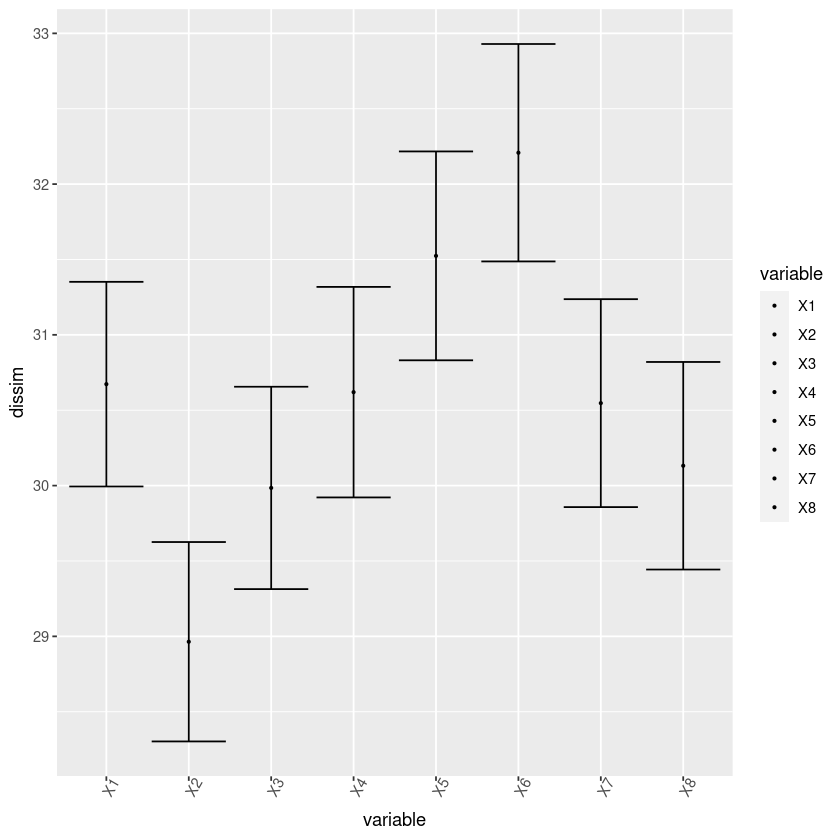

Warning message in melt(.):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(.). In the next version, this warning will become an error.”
No id variables; using all as measure variables



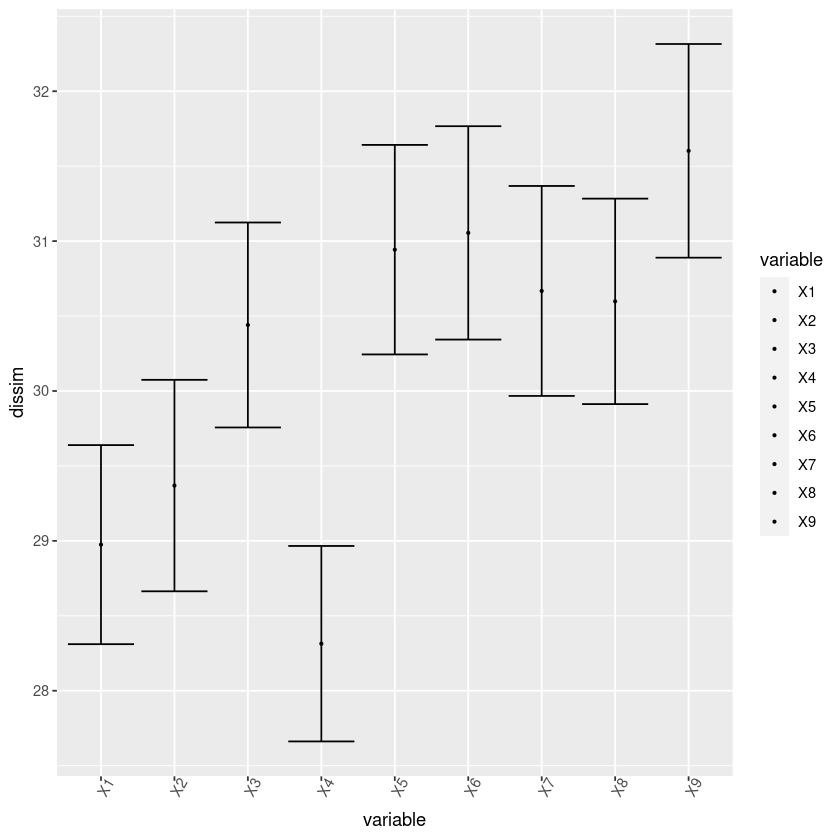

Warning message in melt(.):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(.). In the next version, this warning will become an error.”
No id variables; using all as measure variables



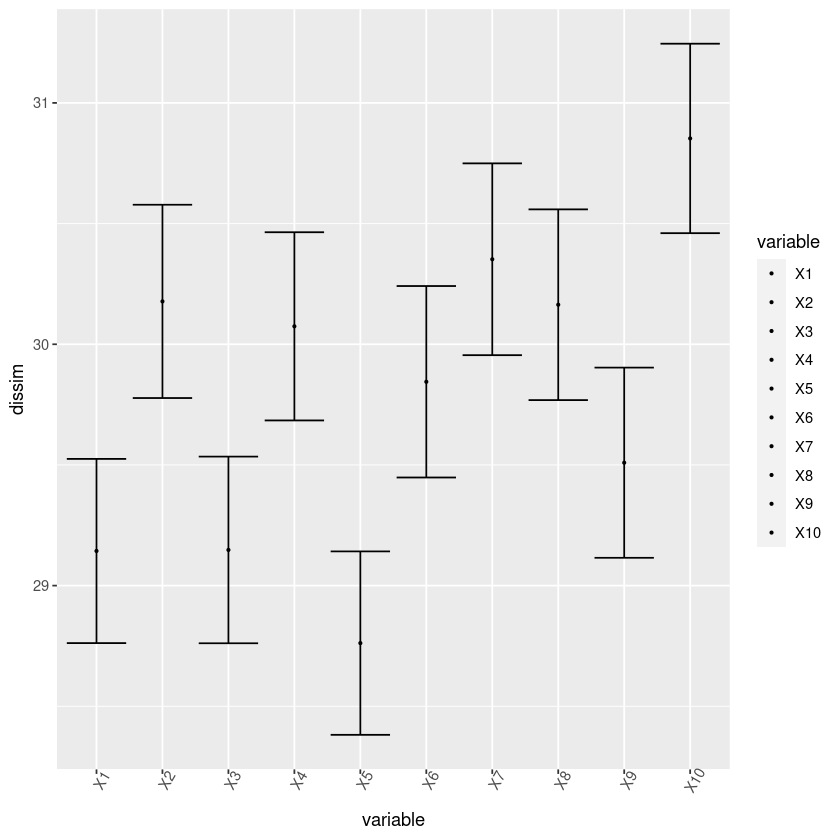

Warning message in melt(.):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(.). In the next version, this warning will become an error.”
No id variables; using all as measure variables



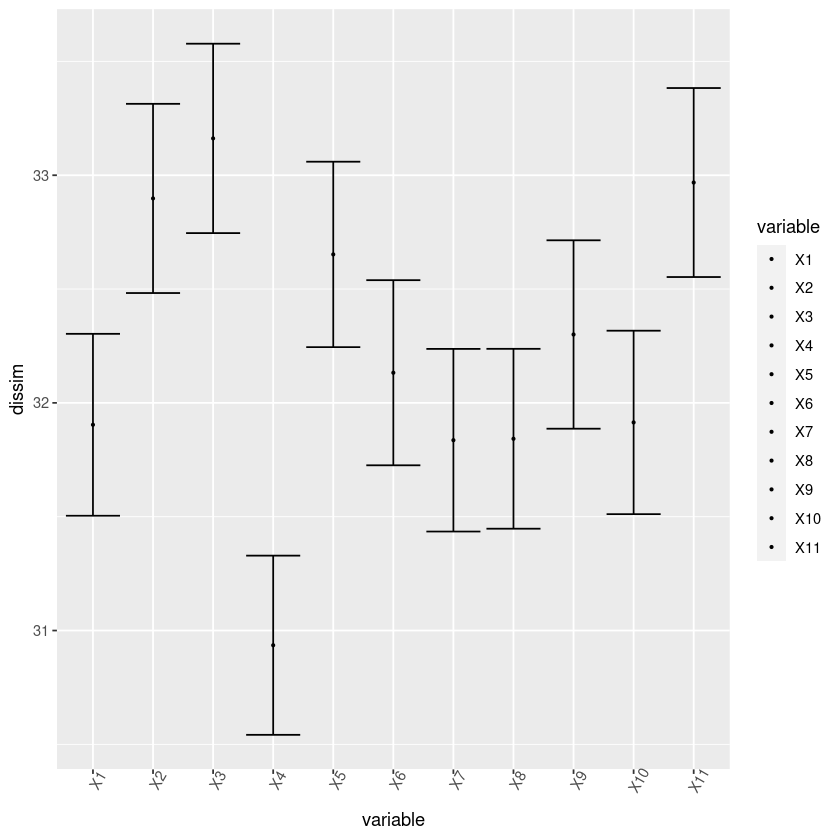

Warning message in melt(.):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(.). In the next version, this warning will become an error.”
No id variables; using all as measure variables



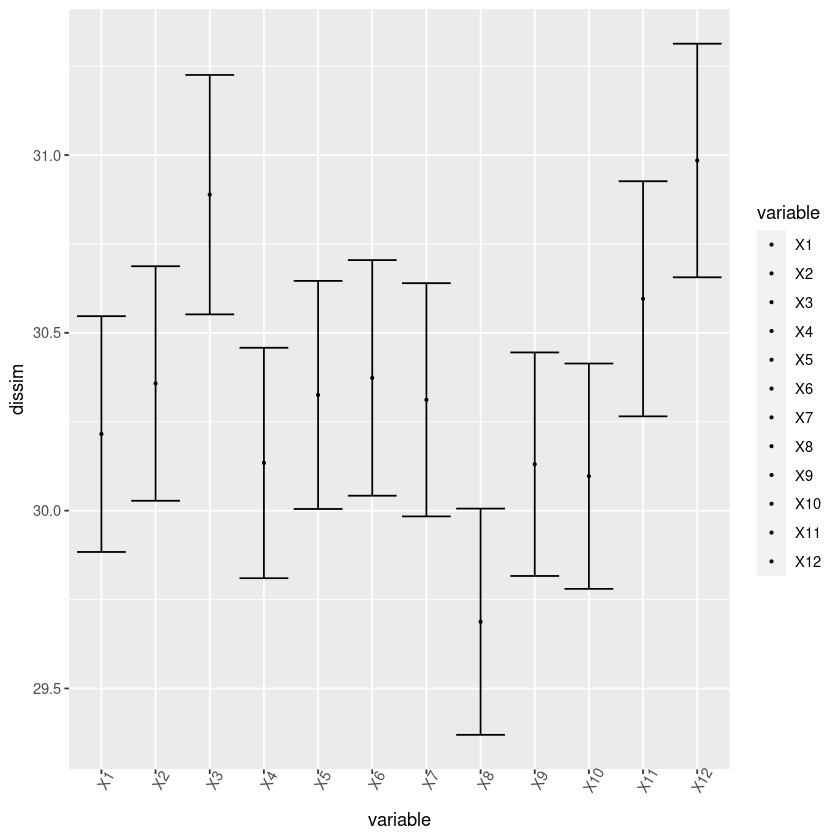

Warning message in melt(.):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(.). In the next version, this warning will become an error.”
No id variables; using all as measure variables



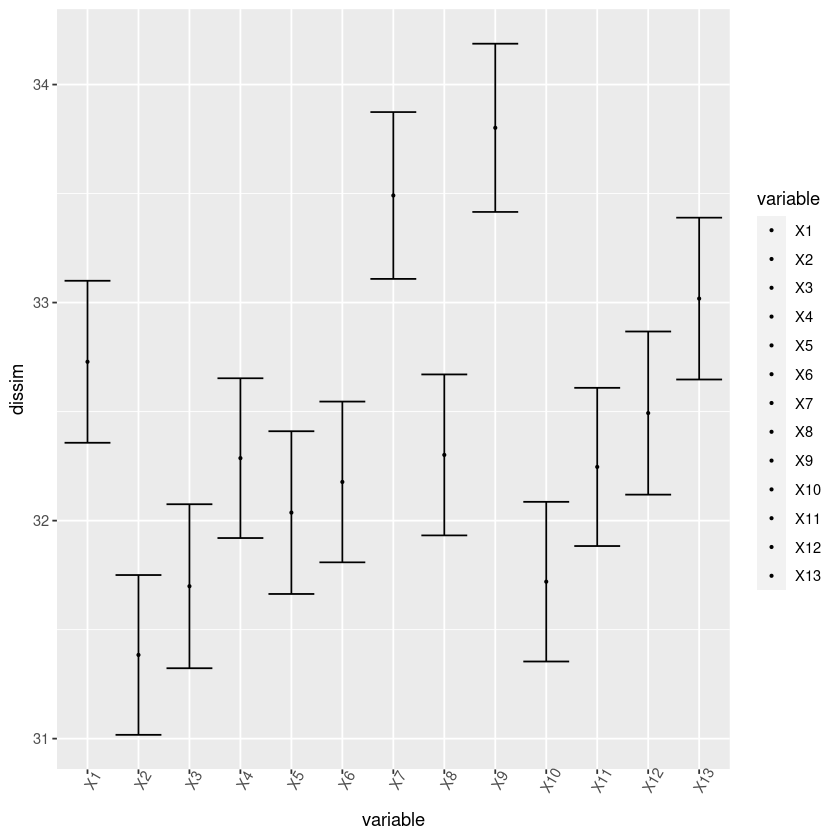

Warning message in melt(.):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(.). In the next version, this warning will become an error.”
No id variables; using all as measure variables



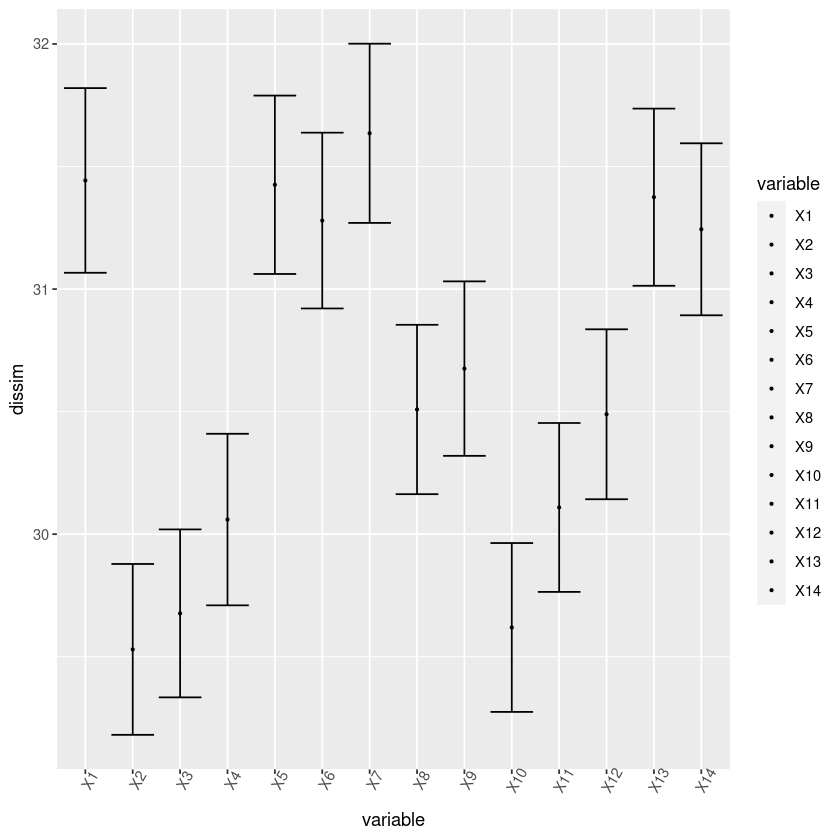

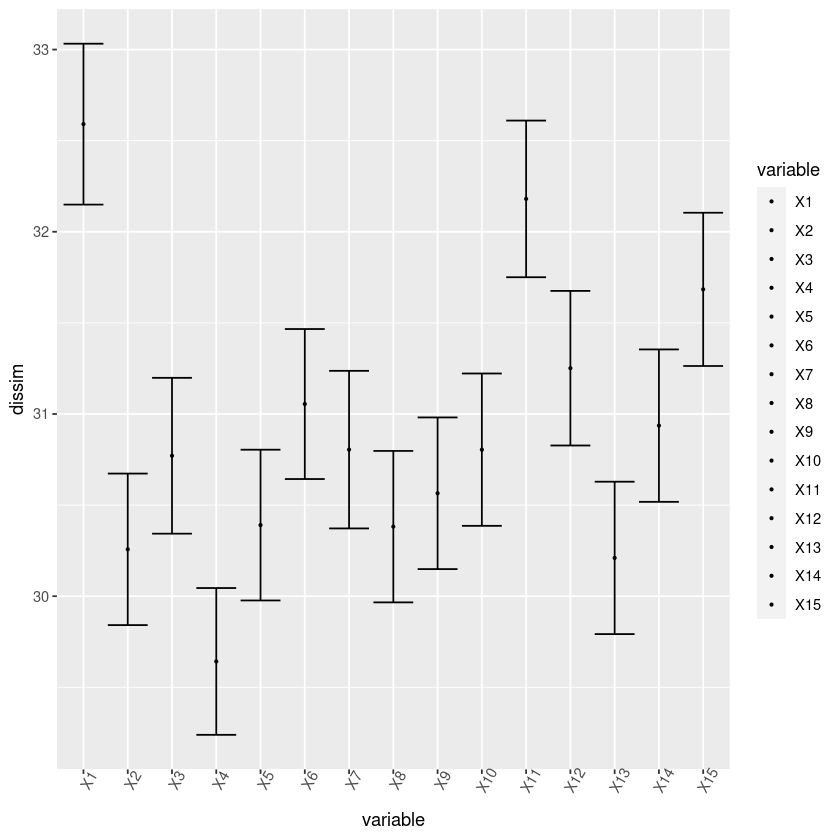

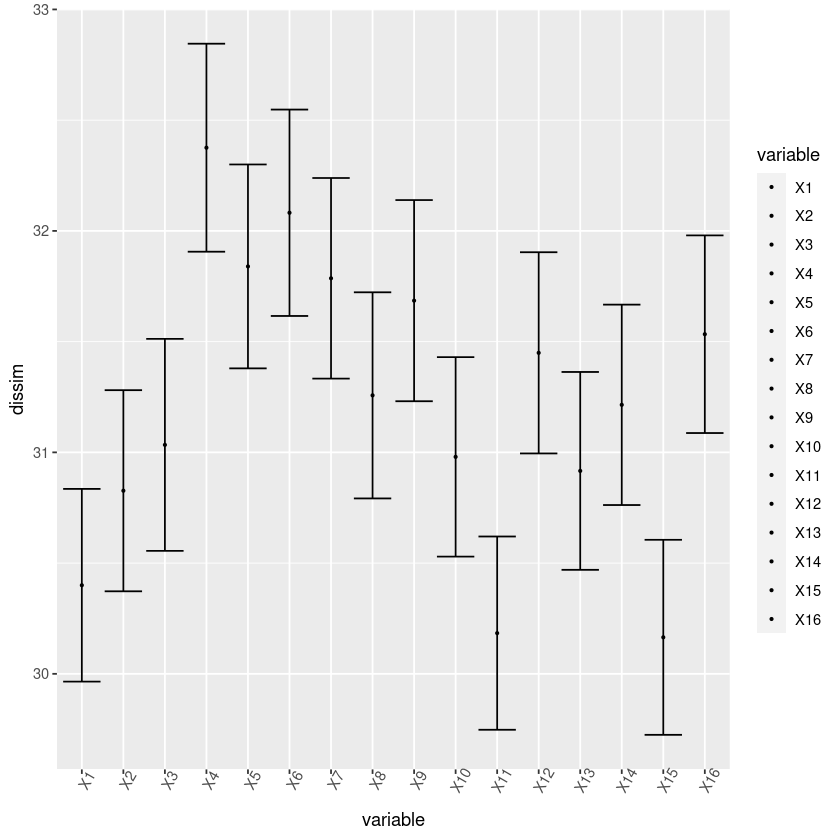

In [64]:
library("tidyverse")

#Import list of dissimilarities
 #upsampled using bilinear interpolation

for(i in 6:16){
    oi = base()
    oi %<>% filter(album_length == i)
    oi %<>% select(album_id, track_number, valence, energy, loudness, tempo)
    oi = album_splitter(oi)

    #Generating dissimilarities
    oi = dissim_gen(oi)


    for(i in 1:length(oi)){
        oi[[i]] <- data.frame(oi[[i]])
    }

    final = bind_rows(oi)

    final %<>% melt()

    # # Plotting
    ha = final %>%
        na.omit() %>% 
        group_by(variable) %>%
        summarise(dissim = mean(value), stder = sd(value)/sqrt(length(value))) %>%
        mutate(track_ref = fct_reorder(.f = variable, .x = dissim, .fun = mean)) %>% 
        ggplot(aes(x = variable, y = dissim, fill = variable))+
            geom_point(size = 0.5)+
            geom_errorbar(aes(ymin = dissim-stder, ymax = dissim+stder)) +
        theme(axis.text.x = element_text(angle = 60))
    print(ha)
}